In [1]:
# imports required for running this notebook
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import *
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import *
import cv2
from math import log10, sqrt

In [3]:
# We are not going to upload the data set into GitHub due to it's large size but instead would provide a link in the Readme File for the same.


# retrieving the training and testing sets from the dataset in local
training_img, testing_img = os.listdir('./dataset/images/train'), os.listdir('./dataset/images/test')
training_img, testing_img = sorted(training_img), sorted(testing_img) 

Mounted at /content/gdrive


In [4]:
# declaring the essential variables for image list iteration
train_image_list, test_image_list = list(), list()
training_img_length, testing_img_length = len(training_img), len(testing_img)
# img_train_iter = img_test_iter = 0
target_size_tuple = (256, 256)

In [5]:
def image_to_numpy(specific_set, type):
    img_iter = 0
    specific_set_length = len(specific_set)
    local_img_list = list()
    while img_iter < specific_set_length:
        local_img = image.load_img(f'./dataset/images/{type}/' + specific_set[img_iter], target_size=target_size_tuple)
        local_img = image.img_to_array(local_img)
        local_img = local_img / 255
        local_img_list.append(local_img)
        img_iter += 1
    return np.array(local_img_list)

In [6]:
train_df = image_to_numpy(training_img, 'train')
test_df = image_to_numpy(testing_img, 'test')

In [7]:
#plotting image sets
def img_plot(dataset, local_iter=5):
    fig, ax = plt.subplots(1, 5)
    fig.set_size_inches(40, 20)
    while local_iter in range(5, 10):
        ax[local_iter - 5].imshow(dataset[local_iter].reshape(256, 256, 3))
        local_iter += 1
    plt.show()

In [8]:
#Applying 0.05 factor gaussian noise
def gaussian_noise(local_img):
    mean, sigma = 0, 1
    gaussian = np.random.normal(mean, sigma, local_img.shape)
    gaussian = gaussian.reshape(local_img.shape)
    return local_img + gaussian * 0.1

In [9]:
# calling the gaussian_noise function to add noise to each train image
def noise_adder_train(iter=0, noised_df=list()):
    while iter in range(len(train_df)):
        noisy_train_gauss = gaussian_noise(train_df[iter])
        noised_df.append(noisy_train_gauss)
        iter += 1
    return noised_df


noised_train_df = np.array(noise_adder_train())

In [10]:
# calling the gaussian_noise function to add noise to each test image
def noise_adder_test(iter=0, noised_df=list()):
    while iter in range(len(test_df)):
        noisy_test_gauss = gaussian_noise(test_df[iter])
        noised_df.append(noisy_test_gauss)
        iter += 1
    return noised_df


noised_test_df = np.array(noise_adder_test())

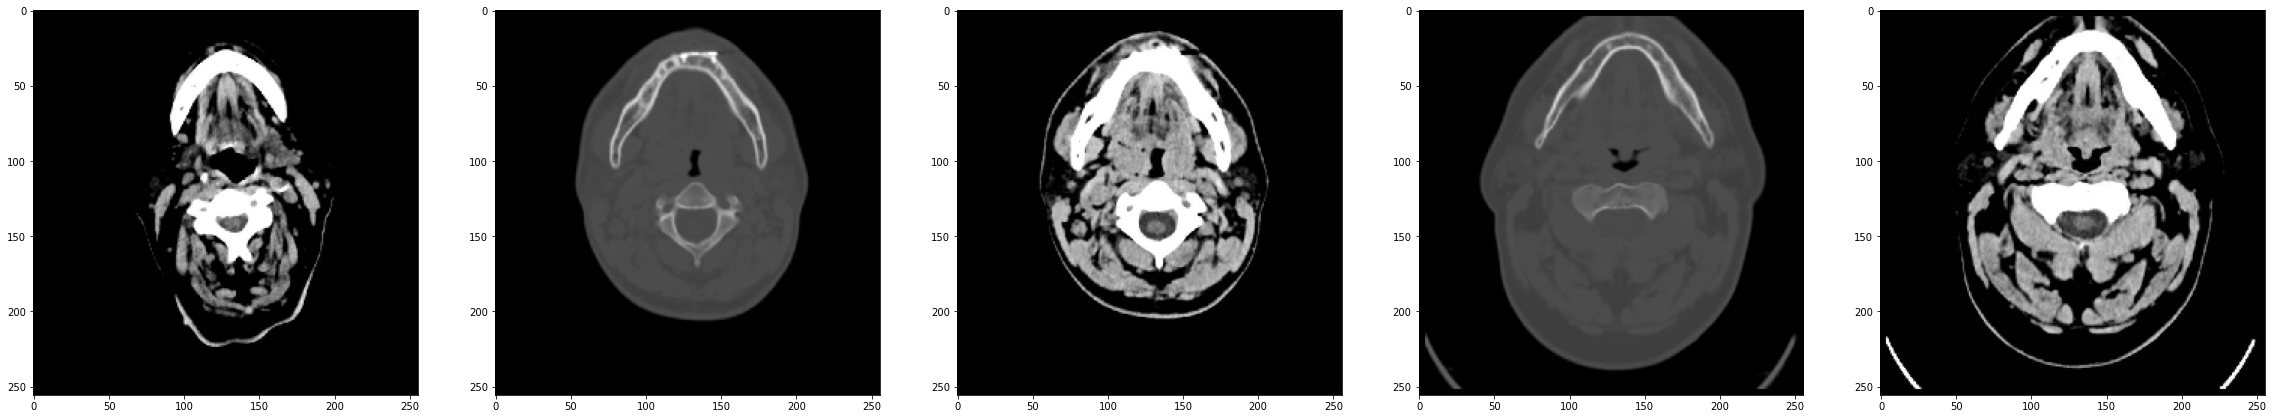

In [11]:
# plotting the train set
img_plot(train_df)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


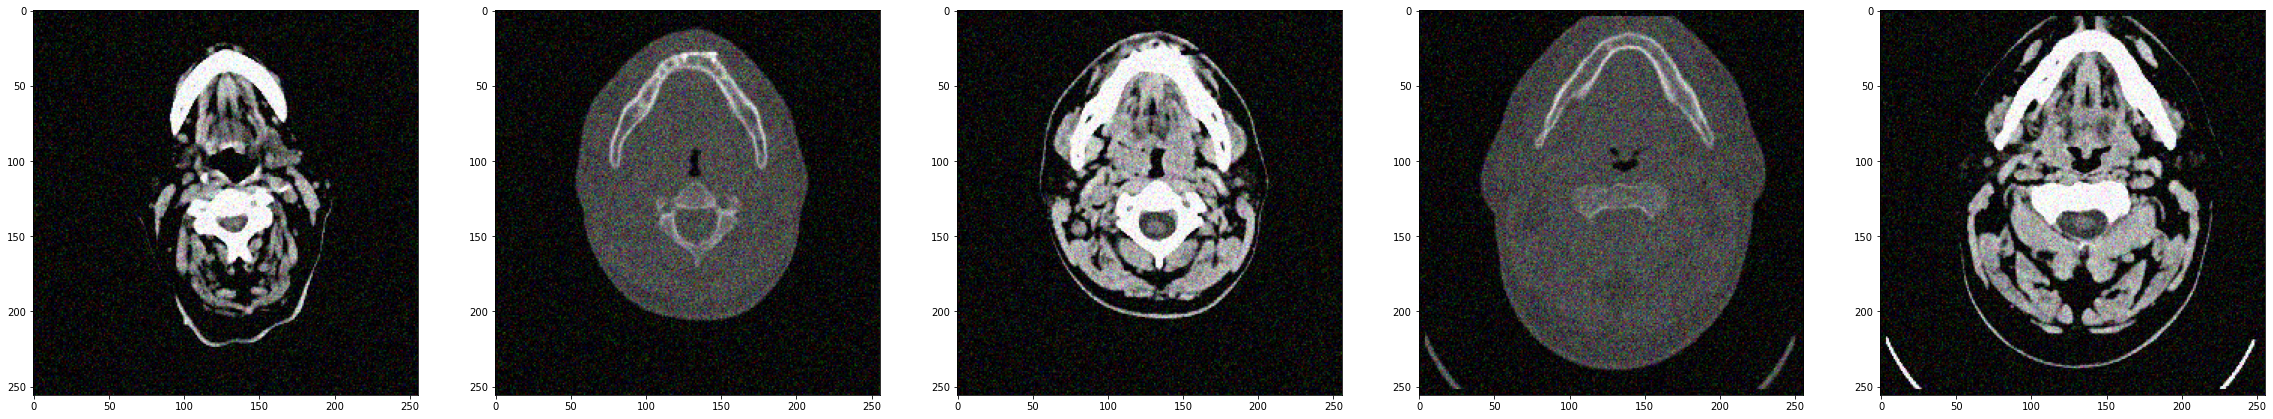

In [12]:
# plotting the noised train set
img_plot(noised_train_df)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


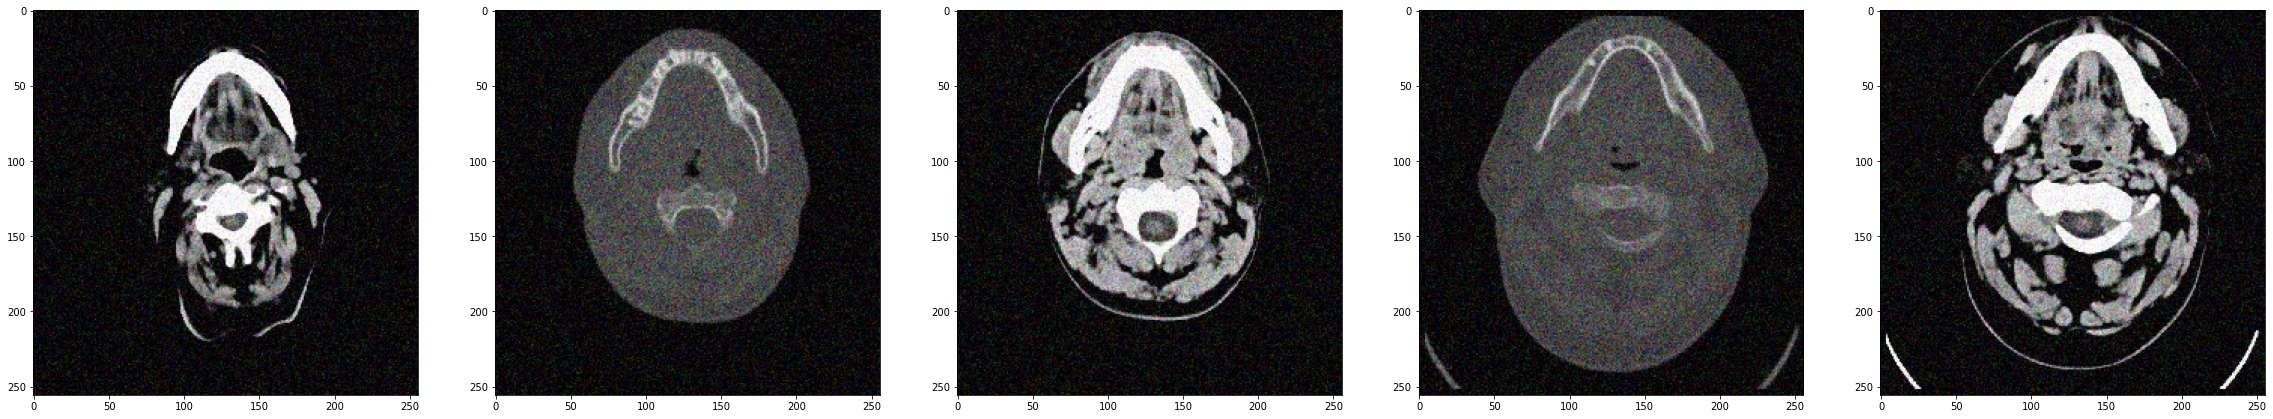

In [13]:
# plotting the test set
img_plot(noised_test_df)

In [14]:
#noised data
noised_train, value = noised_train_df[:750], noised_train_df[254:]

In [15]:
final_img_shape = (256, 256, 3)

In [16]:
def unet():
        P0 = x = Input(shape=(None,None,3),name="unet_input")
        x = Conv2D(64, (3, 3), strides=(1, 1), name='conv1', use_bias=True,padding="same")(x)
        x = Lambda(lambda t:keras.activations.relu(t,alpha=0.1))(x)
        x = Conv2D(64, (3, 3), strides=(2, 2), name='conv1a', use_bias=True,padding="same")(x)
        P1= x = Lambda(lambda t:keras.activations.relu(t,alpha=0.1))(x)

        x = Conv2D(64,(3,3),strides=(1,1),name='conv2',use_bias=True,padding="same")(x)
        x = Lambda(lambda t:keras.activations.relu(t,alpha=0.1))(x)
        x = Conv2D(64,(3,3),strides=(2,2),name='conv2a',use_bias=True,padding="same")(x)
        P2= x = Lambda(lambda t:keras.activations.relu(t,alpha=0.1))(x)
        
        x = Conv2D(128,(3,3),strides=(1,1),name='conv3',use_bias=True,padding="same")(x)
        x = Lambda(lambda t:keras.activations.relu(t,alpha=0.1))(x)
        x = Conv2D(128,(3,3),strides=(2,2),name='conv3a',use_bias=True,padding="same")(x)
        P3= x = Lambda(lambda t:keras.activations.relu(t,alpha=0.1))(x)

        x = Conv2D(128,(3,3),strides=(1,1),name='conv4',use_bias=True,padding="same")(x)
        x = Lambda(lambda t:keras.activations.relu(t,alpha=0.1))(x)
        x = Conv2D(128,(3,3),strides=(2,2),name='conv4a',use_bias=True,padding="same")(x)
        P4= x = Lambda(lambda t:keras.activations.relu(t,alpha=0.1))(x)

        x = Conv2D(256,(3,3),strides=(1,1),name='conv5',use_bias=True,padding="same")(x)
        x = Lambda(lambda t:keras.activations.relu(t,alpha=0.1))(x)
        x = Conv2D(256,(3,3),strides=(2,2),name='conv5a',use_bias=True,padding="same")(x)
        P5= x = Lambda(lambda t:keras.activations.relu(t,alpha=0.1))(x)

        x = Conv2DTranspose(128, (3,3),strides=(1, 1),name='deconv4',padding='same')(x)
        x = Lambda(lambda t:keras.activations.relu(t,alpha=0.1))(x)
        x = Conv2DTranspose(128, (3,3),strides=(2, 2),name='deconv4a',padding='same')(x)
        x = Lambda(lambda t:keras.activations.relu(t,alpha=0.1))(x)
        C4= x = Add()([P4,x])

        x = Conv2DTranspose(128, (3,3),strides=(1, 1),name='deconv3',padding='same')(x)
        x = Lambda(lambda t:keras.activations.relu(t,alpha=0.1))(x)
        x = Conv2DTranspose(128, (3,3),strides=(2, 2),name='deconv3a',padding='same')(x)
        x = Lambda(lambda t:keras.activations.relu(t,alpha=0.1))(x)
        C3= x = Add()([P3,x])


        x = Conv2DTranspose(64, (3,3),strides=(1, 1),name='deconv2',padding='same')(x)
        x = Lambda(lambda t:keras.activations.relu(t,alpha=0.1))(x)
        x = Conv2DTranspose(64, (3,3),strides=(2, 2),name='deconv2a',padding='same')(x)
        x = Lambda(lambda t:keras.activations.relu(t,alpha=0.1))(x)
        C2= x = Add()([P2,x])

        x = Conv2DTranspose(64, (3,3),strides=(1, 1),name='deconv1',padding='same')(x)
        x = Lambda(lambda t:keras.activations.relu(t,alpha=0.1))(x)
        x = Conv2DTranspose(64, (3,3),strides=(2, 2),name='deconv1a',padding='same')(x)
        x = Lambda(lambda t:keras.activations.relu(t,alpha=0.1))(x)
        C1= x = Add()([P1,x])

        x = Conv2DTranspose(64, (3,3), strides=(1, 1),name='deconv0',padding='same')(x)
        x = Lambda(lambda t:keras.activations.relu(t,alpha=0.1))(x)
        x = Conv2DTranspose(3, (3,3), strides=(2, 2),name='deconv0a',padding='same')(x)
        x = Lambda(lambda t:keras.activations.relu(t,alpha=0.1))(x)
        C0= x = Add()([P0,x])

        x = Conv2D(3,(3,3),strides=(1,1),name='convr',use_bias=True,padding="same")(x)
        denoised_image = Activation('linear')(x)

        model = Model(inputs=P0,outputs=denoised_image)
        model.compile(optimizer='adam', loss='binary_crossentropy')
        return model 

In [17]:
# model summary
model = unet()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 unet_input (InputLayer)        [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1 (Conv2D)                 (None, None, None,   1792        ['unet_input[0][0]']             
                                64)                                                               
                                                                                                  
 lambda (Lambda)                (None, None, None,   0           ['conv1[0][0]']                  
                                64)                                                           

In [19]:
with tf.device('/device:GPU:0'):
    early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')
    model.fit(noised_train, noised_train, epochs=20, batch_size=8, validation_data=(value, value), callbacks=[early_stopping])

Epoch 1/20
94/94 [==============================] - 48s 338ms/step - loss: 0.3323 - val_loss: 0.2169
Epoch 2/20
94/94 [==============================] - 25s 272ms/step - loss: 0.2144 - val_loss: 0.1473
Epoch 3/20
94/94 [==============================] - 26s 272ms/step - loss: 0.1690 - val_loss: 0.0984
Epoch 4/20
94/94 [==============================] - 26s 272ms/step - loss: 0.1171 - val_loss: 0.0375
Epoch 5/20
94/94 [==============================] - 26s 272ms/step - loss: 0.0642 - val_loss: -0.0109
Epoch 6/20
94/94 [==============================] - 25s 272ms/step - loss: 0.0261 - val_loss: -0.0368
Epoch 7/20
94/94 [==============================] - 26s 273ms/step - loss: -0.0042 - val_loss: -0.0740
Epoch 8/20
94/94 [==============================] - 26s 273ms/step - loss: -0.0278 - val_loss: -0.0910
Epoch 9/20
94/94 [==============================] - 26s 272ms/step - loss: -0.0471 - val_loss: -0.1141
Epoch 10/20
94/94 [==============================] - 26s 273ms/step - loss: -0.0649

In [20]:
pred = model.predict(noised_test_df)

In [21]:
#plot predictions 
def plot_predictions(y_true, y_pred):
    f, ax = plt.subplots(3, 5)
    f.set_size_inches(15, 10)
    i = 0 
    while i < 5:
        ax[0][i].imshow(np.reshape(noised_test_df[i], (256, 256, 3)))
        ax[1][i].imshow(np.reshape(y_true[i], (256, 256, 3)))
        ax[2][i].imshow(np.reshape(y_pred[i], (256, 256, 3)))
        i+=1
    plt.tight_layout()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


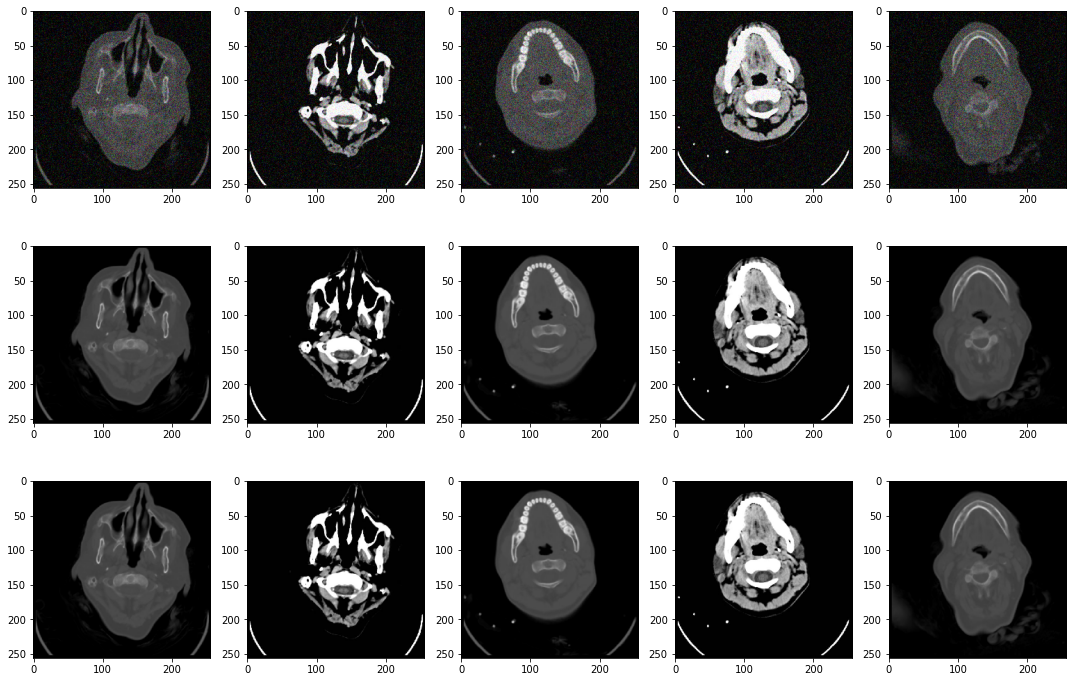

In [22]:
plot_predictions(test_df[:5], pred[:5])

In [23]:
median_blur = cv2.medianBlur(train_df[0], (5))
gaussian_blur=cv2.GaussianBlur(train_df[0],(5,5),0)
average_blur=cv2.blur(train_df[0],(5,5))
bilateral_filter=cv2.bilateralFilter(train_df[0],9,75,75)


In [25]:
# Peak signal to noise ratio calculation
def PSNR(original, denoised):
    mse = np.mean((original - denoised) ** 2)
    if (mse == 0):
        return 100
    max_pixel = 255.0
    div=max_pixel / sqrt(mse)
    psnr = 20 * log10(div)
    return psnr


value_1 = PSNR(value[0], pred[0])
value_2 = PSNR(value[0], median_blur)
value_3 = PSNR(value[0], gaussian_blur)
value_4 = PSNR(value[0], average_blur)
value_5 = PSNR(value[0], bilateral_filter)

print("PSNR values")
print(f"PSNR value of UNet Image : {value_1} dB")
print(f"PSNR value of Median Filter Image : {value_2} dB")
print(f"PSNR value of Gaussian Filter Image : {value_3} dB")
print(f"PSNR value of Average Filter Image : {value_4} dB")
print(f"PSNR value of Bilateral Filter Image : {value_5} dB")

PSNR values
PSNR value of UNet Image : 58.38907623665277 dB
PSNR value of Median Filter Image : 58.842549363921215 dB
PSNR value of Gaussian Filter Image : 58.88161899888283 dB
PSNR value of Average Filter Image : 58.8997907653867 dB
PSNR value of Bilateral Filter Image : 58.91477869182539 dB
